## Introduction:
- Wholesale Customer dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories. 

## Objective:
- Perform clustering analysis and provide inferences accordingly.

In [3]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
#load the data
df = pd.read_csv(r'C:\Users\91842\ML Projects\Retail industry Customer Segmentation\Wholesale customers data.csv')

#display the first 5 records
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
#check the shape
df.shape

(440, 8)

In [4]:
#describe the data
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


- As expected, the spending amount across different product category is varying a lot. 

In [5]:
#missing values check
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

#### Data pre-processing:

In [5]:
x_scalar = StandardScaler()
x_scaled = x_scalar.fit_transform(df)

#### Find the optimal no of clusters using Elbow method

C:\Users\91842\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  f"KMeans is known to have a memory leak on Windows "


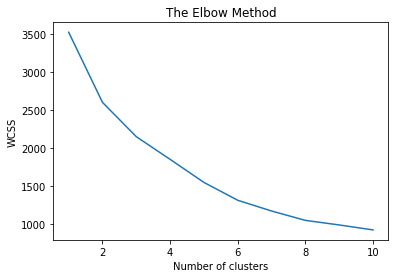

In [6]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Note:
- The imporatnt thing to note here is that, in most of the real-time clustering problems the decision of selecting the number of the clusters may not simply be a straight forward technique. 
- Rather, it may depend on various factors such as the problem statement, the data, the domain of study, the business need etc.

#### Model buidling:

In [6]:
#create instantce of cluters
cluster_model1 = KMeans(n_clusters=3)

#fit the model with the scaled data
cluster_model1.fit(x_scaled)

#use the 'labels_' attribute of the model to label all the data to it's specific cluster
#And store the data in the dataframe
df['Cluster'] = cluster_model1.labels_

#make predictions
predictions = cluster_model1.predict(x_scaled)

#check the data
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,2


In [13]:
print('Total data points assigned to Cluster0:', df[df['Cluster']==0].shape[0])
print('Total data points assigned to Cluster1:', df[df['Cluster']==1].shape[0])
print('Total data points assigned to Cluster2:', df[df['Cluster']==2].shape[0])

Total data points assigned to Cluster0: 297
Total data points assigned to Cluster1: 13
Total data points assigned to Cluster2: 130


#### Cluster Visualization:

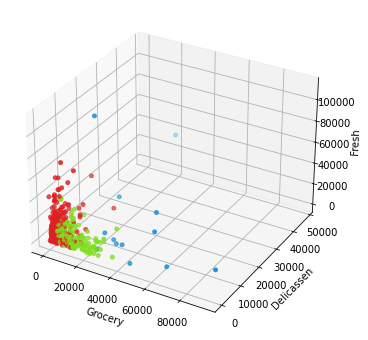

In [9]:
#plot teh clusters:
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib widget
colors = ['#DF2020', '#81DF20', '#2095DF']
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Grocery', 'Delicassen', 'Fresh']])
df['c'] = df.Cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df.Grocery, df.Delicassen, df.Fresh, c=df.c, s=15)
ax.set_xlabel('Grocery')
ax.set_ylabel('Delicassen')
ax.set_zlabel('Fresh')
plt.show()

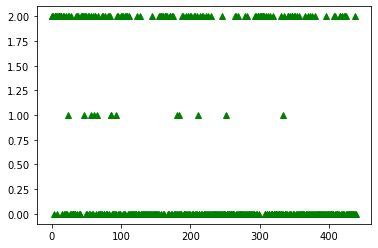

In [14]:
# Fitting K-Means to the dataset
plt.plot(predictions, 'g^')
plt.show()

Observations:
- Most of the customers belong to Cluster# 0 & 2
- Whereas, there are very few customers that belowg to cluster# 1

Probable actions based on observations:
- Retail industry is very competitive, and companies are trying to exploit new market opportunities, the wholesaler may want to to acquire customers in the customer segment1 using suitable strategic actions- sales and marketing efforts, promotions, discounts etc.
- Customer segment # 0 & 2 may have opportunities for growth and future expansion.

#### Know Your Customers: 

In [9]:
Customer_segments_0 = df[df["Cluster"] == 0]
print('Cluster# 0 Customer Channel information:','\n',Customer_segments_0.groupby('Channel').agg({'Cluster':'count'}))
print('*****************************************')

Customer_segments_1 = df[df["Cluster"] == 1]
print('Cluster# 1 Customer Channel information:','\n',Customer_segments_1.groupby('Channel').agg({'Cluster':'count'}))
print('*****************************************')

Customer_segments_2 = df[df["Cluster"] == 2]
print('Cluster# 2 Customer Channel information:','\n',Customer_segments_2.groupby('Channel').agg({'Cluster':'count'}))
print('*****************************************')

Cluster# 0 Customer Channel information: 
          Cluster
Channel         
1            295
2              1
*****************************************
Cluster# 1 Customer Channel information: 
          Cluster
Channel         
1              3
2             11
*****************************************
Cluster# 2 Customer Channel information: 
          Cluster
Channel         
2            130
*****************************************


### Inferences Based On Customer Segments/Clusters:

##### 1. Channel-wise customer segments:
- Channel1 : Hotels/Restaurants/Café etc (B2B)
- Channel2 : Retail customers/Individual buyers (B2C) 

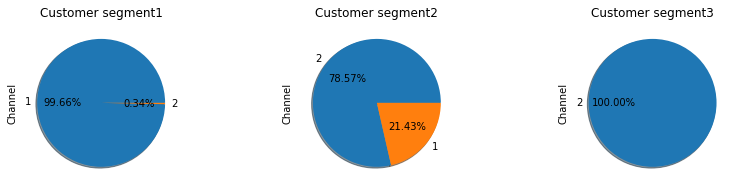

In [15]:
plt.subplot(331)
plt.title('Customer segment1')
Output = None
(Customer_segments_0['Channel'].value_counts() * 100 / len(df)).plot.pie(autopct='%1.2f%%', shadow=True, figsize=(14, 10));


plt.subplot(332)
plt.title('Customer segment2')
Output = None
(Customer_segments_1['Channel'].value_counts() * 100 / len(df)).plot.pie(autopct='%1.2f%%', shadow=True, figsize=(14, 10));


plt.subplot(333)
plt.title('Customer segment3')
Output = None
(Customer_segments_2['Channel'].value_counts() * 100 / len(df)).plot.pie(autopct='%1.2f%%', shadow=True, figsize=(14, 10));


Observations:
- `Cluster1: 99.66% belong the Channel1, i.e Hotels/Restaurants/Café etc (B2B)`
- `Cluster2: There are some overlap present in this cluster. Most of the customers are of type Channel1 and rest are of type Channel2 (79% B2B and 21% B2C)`
- `Cluster3: 100% belong the Channel2, i.e the retail customers or the individual buyers (B2C)`

#### 2. Now let's retrieve insights on customer segment1: Cluster# 0 (B2B Customers)

Questions to be answered in this section:
- Which region has the most of the business cutomers?
- For which product category the annual expenditure is the highest for business customers?
- How the buying patterns look like for the business customers for each product category? 
- Is their any similarity among their buying patterns?

###### B2B Customers Region-wise:

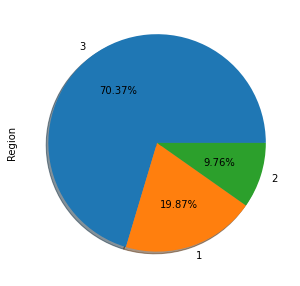

In [46]:
plt.figure(figsize=(5,5))
(Customer_segments_0['Region'].value_counts() * 100 / len(df)).plot.pie(autopct='%1.2f%%', shadow=True);

Observations:
- Business customers belong to different regions. 
- Among all the regions 'Oporto' has the lowest numebr of such customers. As expansion strategy our client can look for more customers in this region after giving due diligence for the points such as - research  if the market is whether saturated in that region or not, research about the existing competitors in that region, population growth in that area etc. 

##### B2B Customers annual spending on daily essential items : Fresh, Milk & Grocery

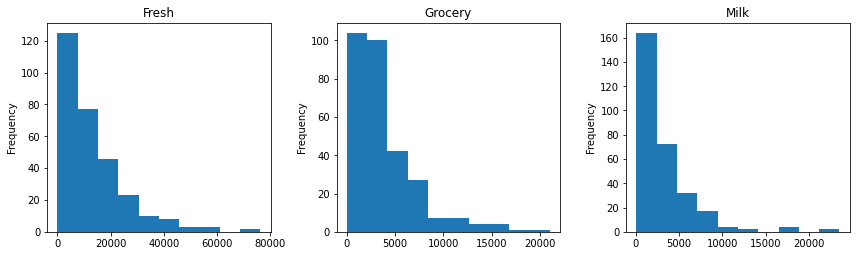

In [35]:
plt.subplot(331)
plt.title('Fresh')
Output = None
Customer_segments_0["Fresh"].plot(kind = "hist", bins = 10, figsize=(12,10))

plt.subplot(332)
plt.title('Grocery')
Output = None
Customer_segments_0["Grocery"].plot(kind = "hist", bins = 10, figsize=(12,10))

plt.subplot(333)
plt.title('Milk')
Output = None
Customer_segments_0["Milk"].plot(kind = "hist", bins = 10, figsize=(12,10))
plt.tight_layout()

Observations:
- Among all the essential product categories the average annual spending looks significantly high for 'Fresh' items in comparison to other items. Which is of no surprise because Hotel/Restaurant/Cafe etc need fresh vegetables/fruits on daily basis for food preparation.

Strategy:
- The wholesaler can attract more business customers by giving discounts on fresh items seasonaly.
- If I run a busy restaurant, buying food in bulk often means I can get discounted prices from my distributors/vendor partners. This in turn means I can offer competitive prices to my customers. Which will be a win-win for both the wholesaler as well as me.

###### B2B Customers annual spending on Frozen or Ready-to-eat items:  Frozen, Delicassen

In [31]:
Customer_segments_0.groupby('Region').agg({'Frozen':'mean','Delicassen':'mean'}).sort_values(by=['Frozen','Delicassen'], ascending=False)

,Frozen,Delicassen
Region,,
2,5945.517241,1187.965517
3,3436.971292,1262.511962
1,3127.322034,1197.152542


<AxesSubplot:title={'center':'Ready-To-Eat'}, ylabel='Frequency'>

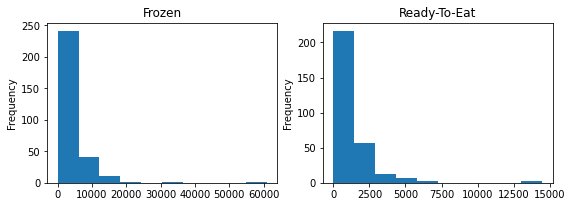

In [36]:
plt.subplot(331)
plt.title('Frozen')
Output = None
Customer_segments_0["Frozen"].plot(kind = "hist", bins = 10, figsize=(14,10))

plt.subplot(332)
plt.title('Ready-To-Eat')
Output = None
Customer_segments_0["Delicassen"].plot(kind = "hist", bins = 10, figsize=(14,10))

Observation:
- As expected, the annual spending for 'Delicassen' or Ready-to-eat items for business customers is very low. 

#### 3. Now let's retrieve insights on customer segment2: Cluster# 2 (B2C Customers)

Questions to be answered in this section:
- Is there scope of business expansion according to Region of the customers?
- What insights we can get from the purchase patterns based on product categories (Essential items)?
- What insights we can get from the purchase patterns based on product categories (Frozen items/Ready-to-eat items)?

###### B2C Customers Region-wise:

<AxesSubplot:ylabel='Region'>

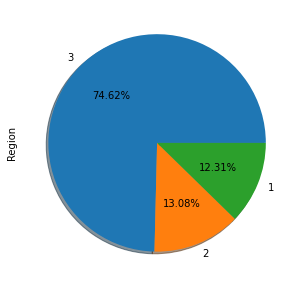

In [38]:
plt.figure(figsize=(5,5))
(Customer_segments_2['Region'].value_counts() * 100 / len(df)).plot.pie(autopct='%1.2f%%', shadow=True)

Observation:
- Retail customers/individual buyers belong to different regions.
- The wholesaler may want to expand it's business in region 2 and 1 (Lisbon and Opporto). 

Startagey/plan of actions:
- Research that specific region's market share by the wholesaler and it's competitors. 
- Region specific research on customers average income, customized offers, customized service like home delivery option, sales promotions, focus on advertisements, feedback from customters etc.

###### B2C Customers  annual spending on daily essential items : Fresh, Milk & Grocery

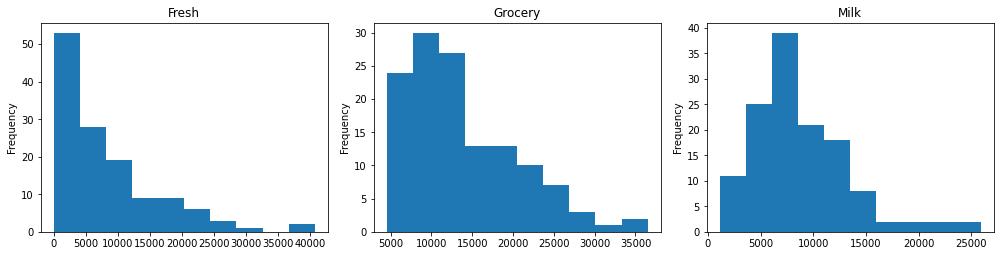

In [40]:
plt.subplot(331)
plt.title('Fresh')
Output = None
Customer_segments_2["Fresh"].plot(kind = "hist", bins = 10, figsize=(14,10))

plt.subplot(332)
plt.title('Grocery')
Output = None
Customer_segments_2["Grocery"].plot(kind = "hist", bins = 10, figsize=(14,10))

plt.subplot(333)
plt.title('Milk')
Output = None
Customer_segments_2["Milk"].plot(kind = "hist", bins = 10, figsize=(14,10))
plt.tight_layout()

Observations:
- Among all the essential product categories the average annual spending looks significantly high for 'Grocery' items and 'Milk' in comparison to 'Fresh' items.


###### B2C Customers  annual spending on daily non-essential items : Frozen, Ready-to-eat

<AxesSubplot:title={'center':'Ready-To-Eat'}, ylabel='Frequency'>

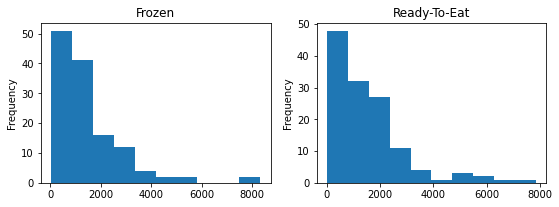

In [43]:
plt.subplot(331)
plt.title('Frozen')
Output = None
Customer_segments_2["Frozen"].plot(kind = "hist", bins = 10, figsize=(14,10))

plt.subplot(332)
plt.title('Ready-To-Eat')
Output = None
Customer_segments_2["Delicassen"].plot(kind = "hist", bins = 10, figsize=(14,10))

Observation:
- In comparison to business customers, the retail custmers spend significantly high amount on ready-to-eat products.
- But Frozen items are consumed by both the type of the customers. The only difference is that there are very few business cutomers who spend significantly high amount for Frozen items. 
- It seems that proactive lifestyle has urged all type consumer to depend on frozen food products. So, this seems to be a crucial product segment to meet the need of both tyoe of the customers.

## Conclusions: Based on cluster analysis the wholesaler may take actions to identify the areas of improvements, more customer acquisition and future expansion plan as well

#### Strategies for B2B customers:
- The majority of the customers of this wholesaler are the business customers like Hotels/Restaurants/Café etc. As expansion strategy the wholesaler can look for more customers in region like Oporto after giving due diligence for the points such as - research if the market is already saturated in that region or not, research about the existing competitors in that region, population growth in that area etc.
- This segment of customer spend significantly high amount on Fresh products in comparison to other products. At the same time, they also spend decent amount on Frozen items too. So, the wholesaler may want to build long term relationship/contract with the local distributors and food manufacturers to optimize it's inventory for these products. It will not only assure the regular replenishment of the items but also it will minimization the unnecessary storage.


#### Strategies for B2C customers:
- There is a scope of attracting more retail customers in regions like Lisbon and Oporto. The wholesaler may need to do research that specific region's market share by itself and by it's competitors. Region specific research on customers average income, send customized offers, electronic coupons generation, customized service like home delivery option, sales promotions, focus on advertisements, feedback from customers etc.

- Most of the spending for this segment is for day-to-day items like - Grocery and Milk. At the same time, we also observed that such customers are depending on Frozen and ready-to-eat items as well.

- Frozen items are consumed by both the type of the customers. The only difference is that there are few business customers who spend significantly high amount for Frozen items. It seems that proactive lifestyle has urged all type consumers to depend on frozen food products. So, this seems to be a crucial product category to meet the demand of both type of the customers.
